In [1]:
import pandas as pd
import numpy as np
dataFrame = pd.read_excel("maliciousornot.xlsx")
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [2]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot: xlabel='Type', ylabel='count'>

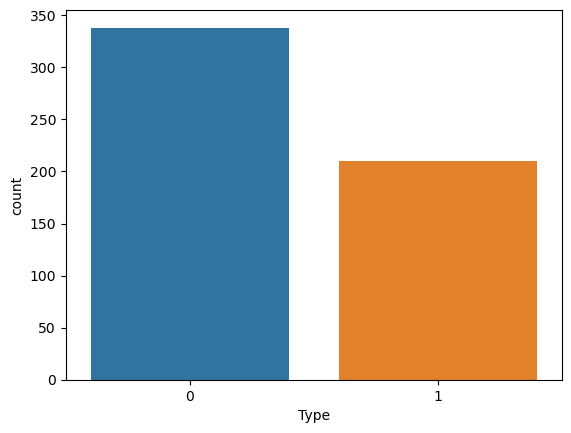

In [3]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.countplot(x="Type",data = dataFrame)

<AxesSubplot: >

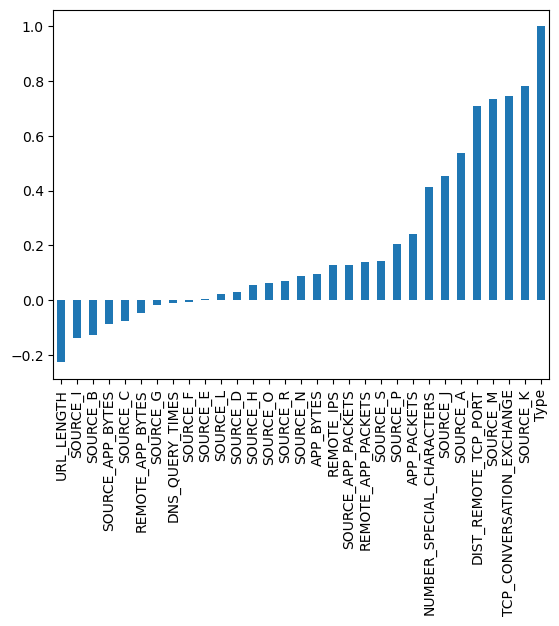

In [4]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [5]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis=1).values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer="adam")
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=700,verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 13ms/step - loss: 0.6894 - val_loss: 0.6913
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6713 - val_loss: 0.6808
Epoch 3/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6528 - val_loss: 0.6682
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6303 - val_loss: 0.6480
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5985 - val_loss: 0.6166
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5535 - val_loss: 0.5777
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4976 - val_loss: 0.5309
Epoch 8/700
12/12 [==============================] - 0s 2ms/step - loss: 0.4376 - val_loss: 0.4744
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3870 - val_loss: 0.4551
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3345 - val_loss: 0.4048
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.2766
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0535 - val_loss: 0.2829
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.2820
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.2777
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.2837
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.2782
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.2785
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.2943
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.2808
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.2925
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.2660
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.2749
Epoch 166/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.2669
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.2699
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.2716
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.2678
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.2663
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.2737
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.2679
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.2684
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.3044
Epoch 246/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.2997
Epoch 247/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.3057
Epoch 248/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.3069
Epoch 249/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.3123
Epoch 250/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.2992
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.3038
Epoch 252/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.3029
Epoch 253/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.3037
Epoch 254/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.3057
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.3621
Epoch 327/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.3540
Epoch 328/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.3577
Epoch 329/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.3604
Epoch 330/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.3598
Epoch 331/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.3585
Epoch 332/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.3622
Epoch 333/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.3634
Epoch 334/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.3640
Epoch 335/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.3695
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.4112
Epoch 408/700
12/12 [==============================] - 0s 3ms/step - loss: 9.7830e-04 - val_loss: 0.3998
Epoch 409/700
12/12 [==============================] - 0s 3ms/step - loss: 9.4517e-04 - val_loss: 0.3979
Epoch 410/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.4040
Epoch 411/700
12/12 [==============================] - 0s 3ms/step - loss: 9.9264e-04 - val_loss: 0.4046
Epoch 412/700
12/12 [==============================] - 0s 3ms/step - loss: 9.9490e-04 - val_loss: 0.4038
Epoch 413/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.4057
Epoch 414/700
12/12 [==============================] - 0s 3ms/step - loss: 9.1999e-04 - val_loss: 0.4039
Epoch 415/700
12/12 [==============================] - 0s 3ms/step - loss: 9.5137e-04 - val_loss: 0.4183
Epoch 416/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0010

12/12 [==============================] - 0s 3ms/step - loss: 4.9781e-04 - val_loss: 0.4715
Epoch 486/700
12/12 [==============================] - 0s 3ms/step - loss: 6.2045e-04 - val_loss: 0.4723
Epoch 487/700
12/12 [==============================] - 0s 3ms/step - loss: 4.5446e-04 - val_loss: 0.4755
Epoch 488/700
12/12 [==============================] - 0s 3ms/step - loss: 4.3400e-04 - val_loss: 0.4749
Epoch 489/700
12/12 [==============================] - 0s 3ms/step - loss: 4.2344e-04 - val_loss: 0.4767
Epoch 490/700
12/12 [==============================] - 0s 3ms/step - loss: 4.3414e-04 - val_loss: 0.4749
Epoch 491/700
12/12 [==============================] - 0s 3ms/step - loss: 3.9175e-04 - val_loss: 0.4798
Epoch 492/700
12/12 [==============================] - 0s 3ms/step - loss: 4.5886e-04 - val_loss: 0.4787
Epoch 493/700
12/12 [==============================] - 0s 3ms/step - loss: 5.9598e-04 - val_loss: 0.4772
Epoch 494/700
12/12 [==============================] - 0s 3ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 2.4879e-04 - val_loss: 0.5307
Epoch 564/700
12/12 [==============================] - 0s 3ms/step - loss: 2.8131e-04 - val_loss: 0.5272
Epoch 565/700
12/12 [==============================] - 0s 3ms/step - loss: 2.0173e-04 - val_loss: 0.5272
Epoch 566/700
12/12 [==============================] - 0s 3ms/step - loss: 2.0655e-04 - val_loss: 0.5309
Epoch 567/700
12/12 [==============================] - 0s 3ms/step - loss: 1.9538e-04 - val_loss: 0.5338
Epoch 568/700
12/12 [==============================] - 0s 3ms/step - loss: 2.0148e-04 - val_loss: 0.5308
Epoch 569/700
12/12 [==============================] - 0s 3ms/step - loss: 1.9668e-04 - val_loss: 0.5304
Epoch 570/700
12/12 [==============================] - 0s 3ms/step - loss: 1.9649e-04 - val_loss: 0.5332
Epoch 571/700
12/12 [==============================] - 0s 3ms/step - loss: 1.8557e-04 - val_loss: 0.5314
Epoch 572/700
12/12 [==============================] - 0s 3ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 1.1569e-04 - val_loss: 0.5714
Epoch 642/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0466e-04 - val_loss: 0.5696
Epoch 643/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1132e-04 - val_loss: 0.5744
Epoch 644/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0830e-04 - val_loss: 0.5729
Epoch 645/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0566e-04 - val_loss: 0.5746
Epoch 646/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1861e-04 - val_loss: 0.5784
Epoch 647/700
12/12 [==============================] - 0s 2ms/step - loss: 1.0233e-04 - val_loss: 0.5749
Epoch 648/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1576e-04 - val_loss: 0.5749
Epoch 649/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1473e-04 - val_loss: 0.5762
Epoch 650/700
12/12 [==============================] - 0s 3ms/step - 

<AxesSubplot: >

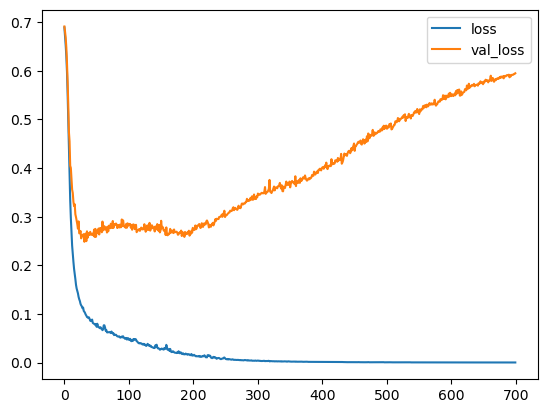

In [7]:
modelloss = pd.DataFrame(model.history.history)
modelloss.plot()

In [8]:
model = Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer="adam")
earlyStop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=700,verbose=1,callbacks=[earlyStop])


Epoch 1/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6907 - val_loss: 0.6805
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6729 - val_loss: 0.6697
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6504 - val_loss: 0.6530
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6233 - val_loss: 0.6331
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5909 - val_loss: 0.6075
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5519 - val_loss: 0.5725
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5075 - val_loss: 0.5363
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4599 - val_loss: 0.4998
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4151 - val_loss: 0.4634
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3714 - val_loss: 0.4203
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0598 - val_loss: 0.2036
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.1966
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.2005
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.1973
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.2001
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.1980
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0522 - val_loss: 0.1982
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0531 - val_loss: 0.1983
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0557 - val_loss: 0.2020
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.2018
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.1744
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.1748
Epoch 166/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0233 - val_loss: 0.1815
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1783
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.1822
Epoch 169/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.1779
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0254 - val_loss: 0.1776
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.1771
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.1860
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1812
Epoc

<AxesSubplot: >

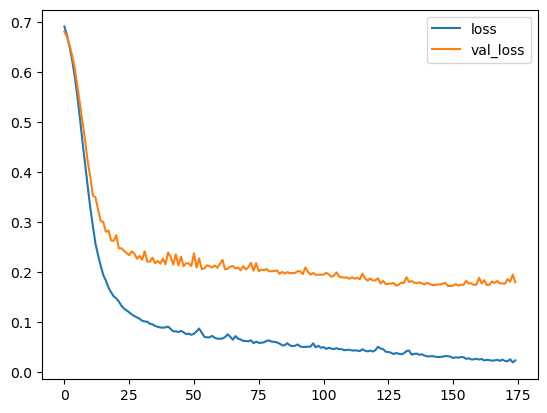

In [9]:
modelloss = pd.DataFrame(model.history.history)
modelloss.plot()

In [11]:
model = Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer="adam")
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=700,verbose=1,callbacks=[earlyStop])


Epoch 1/700
12/12 [==============================] - 0s 10ms/step - loss: 0.7316 - val_loss: 0.6967
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.7019 - val_loss: 0.6945
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6849 - val_loss: 0.6924
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6768 - val_loss: 0.6890
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6967 - val_loss: 0.6858
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6596 - val_loss: 0.6827
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6715 - val_loss: 0.6799
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6791 - val_loss: 0.6778
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6767
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6512 - val_loss: 0.6738
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.2814 - val_loss: 0.3233
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2747 - val_loss: 0.3158
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2578 - val_loss: 0.3200
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2692 - val_loss: 0.3277
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2586 - val_loss: 0.3225
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2411 - val_loss: 0.3264
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2489 - val_loss: 0.3245
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2552 - val_loss: 0.3232
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2610 - val_loss: 0.3184
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2340 - val_loss: 0.3089
Epoch 93/700


<AxesSubplot: >

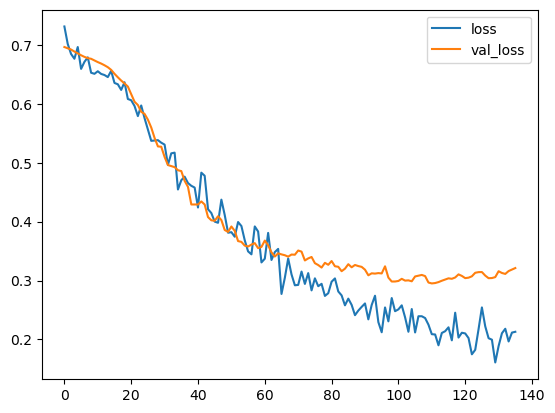

In [12]:
modelloss = pd.DataFrame(model.history.history)
modelloss.plot()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
guesses = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test,guesses))

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(confusion_matrix(y_test,guesses))

[[91  0]
 [74  0]]
